In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [2]:
#To estimate model performance by splitting the dataset into training and testing sets using train_test_split

irs=load_iris()

X=irs.data
y=irs.target



In [3]:
#The model performance measured via accuracy
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=4)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


In [4]:
#to verify how the testing accuracy varies according to which set of observation been chosen - as obvious it is from the result
#the testing accuracy suffers from high variance issues. this is why testing accuracy is known as the high variance estimate
#what if we ran the above cell using a random_state=3
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=3)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


In [7]:
#to demonstrate the splitting of a dataset with 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf=KFold(25, n_folds=5, shuffle=False)

#print the contents of each training and testing set
print('{} {} {}'.format('Iteration', 'Training set', 'Testing set'))
for iteration, data in enumerate(kf, start=1):
    print('{}, {}, {}'.format(iteration, data[0], data[1]))

Iteration Training set Testing set
1, [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24], [0 1 2 3 4]
2, [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24], [5 6 7 8 9]
3, [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24], [10 11 12 13 14]
4, [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24], [15 16 17 18 19]
5, [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19], [20 21 22 23 24]


In [8]:
#To select the best parameter for KNN via cross validation using the iris dataset
#To use only the training data and get X and y for cross validation
from sklearn.cross_validation import cross_val_score

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=3)

knn_cv=KNeighborsClassifier(n_neighbors=5)
score_cv=cross_val_score(knn_cv, X_train, y_train, cv=10, scoring='accuracy')
print(score_cv)

[0.91666667 1.         0.91666667 1.         1.         1.
 1.         1.         1.         0.88888889]


In [15]:
#now onto searching for an optimal value for K (the number of folds in Kfold)
k_val_range=range(1, 31)
k_score=[]
for element in k_val_range:
    knn=KNeighborsClassifier(n_neighbors=element)
    score=cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_score.append(score.mean())
print(k_score)

[0.953888888888889, 0.943888888888889, 0.9622222222222222, 0.953888888888889, 0.9722222222222221, 0.9705555555555556, 0.9705555555555556, 0.9705555555555556, 0.9705555555555556, 0.9522222222222224, 0.9705555555555556, 0.9605555555555556, 0.9522222222222222, 0.9605555555555556, 0.9622222222222222, 0.9605555555555556, 0.9622222222222222, 0.9605555555555556, 0.9522222222222222, 0.9431313131313133, 0.9522222222222222, 0.9431313131313133, 0.9431313131313133, 0.9514646464646466, 0.9514646464646466, 0.9431313131313133, 0.9605555555555556, 0.9597979797979799, 0.9605555555555556, 0.943888888888889]


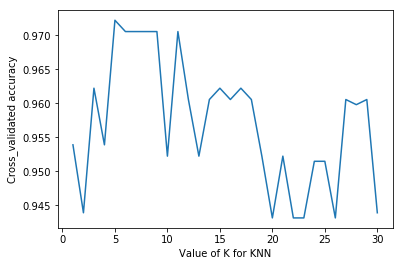

In [16]:
#From the below plot it can be seen that the optimum accuracy is achieved when k ranges from 5 to 9 and at 11. choosing K depends on the situation and the context of business problem. If high variance can be tolerated then we can choose K=11, but if low variance is preferred then we can choose lower values for K in this example K=5 
#but regardless of the values for K we are going for high accuracy
import matplotlib.pyplot as plt
%matplotlib inline

#plot the cross_validated accuracy on y_axis for every value of k on x_axis
plt.plot(k_val_range, k_score)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross_validated accuracy")

In [17]:
#To select the best model amongst options using cross validation
#KNN Vs. logistic regression
# Although from cross validation it appeared that KNeighborsClassifier had high accuracy, but after scoring each model on 
# the test data it is clear that the Logistic Regression has scored high accuracy. Thus the cross validated score may not be the right
# representation of the out-of-sample accuracy estimate and it is important to test the accuracy of the models on test data to pick the best model

#k-fold cross validation to choose the best approximation to the out-of-sample accuracy using KNN
knn_1=KNeighborsClassifier(n_neighbors=11)#I am choosing k=11 from the above cell. although the result is inconclusive, I am going for higher value for K
print(cross_val_score(knn_1, X_train, y_train, cv=10, scoring='accuracy').mean())



0.9705555555555556


In [22]:
knn_1.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')

In [23]:
knn_1.score(X_test, y_test)

0.9736842105263158

In [19]:
#k-fold cross validation to choose the best approximation to the out-of-sample accuracy using logistic regression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
dragon=cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy')
print(dragon.mean())



0.9447979797979797


In [21]:
#To test the Logistic Regression model's performance on the untouched test data

#to figure out: what happens after this cross_val_score and also to verify what I have done below by fitting logreg and have found the score is correct or not?
alum=logreg.fit(X_train, y_train)

alum.score(X_test, y_test)

1.0

In [24]:
#To select the best features using cross validation to fit a model 

#To decide whether to include the 'newspaper' as a feature in fitting a linear model to the dataset

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [26]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [28]:
col_include=['TV','radio','newspaper']

X1=df[col_include]

y1=df['sales']

In [35]:
X_train1, X_test1, y_train1, y_test1=train_test_split(X1, y1, random_state=4)

In [36]:
#10-fold cross validation with all the three features in col_include
lm=LinearRegression()
lm_score=cross_val_score(lm, X_train1, y_train1, cv=10, scoring='neg_mean_squared_error')#it is now neg_mean_squared_error and no more mean_squared_error
print(lm_score)

[-4.64817609 -2.44411865 -7.53220013 -1.64016756 -2.25359703 -3.36652418
 -2.01211011 -1.02656358 -5.89640739 -2.63707105]


In [37]:
#To fix the negative signs of MSE score above
mse_score=-lm_score
print(mse_score)

[4.64817609 2.44411865 7.53220013 1.64016756 2.25359703 3.36652418
 2.01211011 1.02656358 5.89640739 2.63707105]


In [38]:
#convert from mse to rmse(root mean squared value)
import numpy as np
rmse_score=np.sqrt(mse_score)
print(rmse_score)

[2.15596291 1.56336773 2.7444854  1.28069027 1.50119853 1.83480903
 1.41848867 1.01319474 2.42825192 1.62390611]


In [39]:
#To calculate the average of the rmse_score calculated above
print(rmse_score.mean())

1.756435531395855


In [40]:
#to get another rmse value calculated without using the feature: 'newspaper'

#since the goal of calculating rmse score is to reduce error or loss we choose the model with low rmse value and therefore
#we pick the second linear regression model(below) that is fitted without the feature: 'newspaper'

col_include_outnews=['TV','radio']

X11=df[col_include_outnews]

y11=df['sales']

X_train11, X_test11, y_train11, y_test11=train_test_split(X11, y11, random_state=4)

print(np.sqrt(-cross_val_score(lm, X_train11, y_train11, cv=10, scoring='neg_mean_squared_error')).mean())




1.723583266116106


In [64]:
#to calculate validation error along with training error(here validation error is not same as the test error)
#For example, I am going to use the above calculation to find the validation error, which can give an idea about how well
#the model can generalize on unseen data and therefore if further tweaking has to be done could be carried out before finding the testing error

col_include_outnews=['TV','radio']

X11=df[col_include_outnews]

y11=df['sales']

X_train11, X_test11, y_train11, y_test11=train_test_split(X11, y11, random_state=4)

X_train11, X_valid11, y_train11, y_valid11=train_test_split(X_train11, y_train11, random_state=4)



In [94]:
#Leave-One-Out cross validation
col_include_outnews=['TV','radio']

X11_loovc=df[col_include_outnews].reset_index().drop('index', axis=1)

y11_loovc=df['sales'].reset_index().drop('index', axis=1)

loo = LeaveOneOut()

for train_index, test_index in loo.split(X11_loovc):
    X_train1, X_test1 = X11_loovc.loc[train_index], X11_loovc.loc[test_index]
    y_train1, y_test1 = y11_loovc.loc[train_index], y11_loovc.loc[test_index]
    print(y_test1)#only one value is selected as test value for every corresponding row


   sales
0   22.1
   sales
1   10.4
   sales
2    9.3
   sales
3   18.5
   sales
4   12.9
   sales
5    7.2
   sales
6   11.8
   sales
7   13.2
   sales
8    4.8
   sales
9   10.6
    sales
10    8.6
    sales
11   17.4
    sales
12    9.2
    sales
13    9.7
    sales
14   19.0
    sales
15   22.4
    sales
16   12.5
    sales
17   24.4
    sales
18   11.3
    sales
19   14.6
    sales
20   18.0
    sales
21   12.5
    sales
22    5.6
    sales
23   15.5
    sales
24    9.7
    sales
25   12.0
    sales
26   15.0
    sales
27   15.9
    sales
28   18.9
    sales
29   10.5
    sales
30   21.4
    sales
31   11.9
    sales
32    9.6
    sales
33   17.4
    sales
34    9.5
    sales
35   12.8
    sales
36   25.4
    sales
37   14.7
    sales
38   10.1
    sales
39   21.5
    sales
40   16.6
    sales
41   17.1
    sales
42   20.7
    sales
43   12.9
    sales
44    8.5
    sales
45   14.9
    sales
46   10.6
    sales
47   23.2
    sales
48   14.8
    sales
49    9.7
    sales
50   11.4
